# Lab3 Simplified: DQR overview
本笔记本仅保留适用于 `ppr-group-25208508-train.csv` 的数据理解与数据质量检查代码，便于快速跑通并查看数据情况。


## 1) Imports 引入 环境变量

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 140)

sns.set_style('whitegrid')


## 2) Load Dataset 导入训练集

In [ ]:
file_path = 'ppr-group-25208508-train.csv'
df = pd.read_csv(file_path, encoding='utf-8')

print(f'Loaded: {file_path}')
print(f'Shape: {df.shape}')
display(df.head())


Loaded: ppr-group-25208508-train.csv
Shape: (54000, 9)


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,30/09/2016,"28 BRACKEN COURT, DONNYBROOK, CORK",Cork,NaN,"€181,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,20/12/2016,"2 AN CLOCHAR, CONVENT RD, DONERAILE",Cork,NaN,"€50,152.49",No,Yes,New Dwelling house /Apartment,less than 38 sq metres
2,28/09/2016,"Apartment 7 The Court, Clonattin, Gorey",Wexford,NaN,"€62,171.81",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
3,16/09/2016,"6 Monalin, Wicklow Hills, Newtownmountkennedy",Wicklow,NaN,"€223,348.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
4,29/01/2016,"18 Lislea, Frascati Park, Blackrock",Dublin,NaN,"€310,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


# 功能参考:价格筛选,范围>1000000

In [11]:
# pip install dtale
import pandas as pd
import dtale

df = pd.read_csv("ppr-group-25208508-train.csv")
price_num = pd.to_numeric(df["Price (€)"].astype(str).str.replace("€","",regex=False).str.replace(",","",regex=False), errors="coerce")
filtered = df[price_num > 1_000_000]
filtered["Price_num"] = price_num[price_num > 1_000_000]
filtered = filtered.sort_values("Price_num", ascending=False)
d = dtale.show(filtered, open_browser=True)
d  # 会给你本地链接

display(df[price_num > 1_000_000])


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
186,30/09/2016,"1 Ardilea Crescent, Heidelberg, Ardilea",Dublin,NaN,"€1,167,750.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 125 sq metres
200,22/09/2016,"2 Balure Balure Lane, Church Road, Killiney",Dublin,NaN,"€1,330,396.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 125 sq metres
409,29/04/2016,"PERCY LODGE, KILLINEY HILL RD, KILLINEY",Dublin,NaN,"€2,400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
490,06/09/2016,"2 PERCY PLACE, DUBLIN 4, DUBLIN",Dublin,NaN,"€1,200,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
534,23/12/2016,"31 GREEN ROAD, BLACKROCK, CO DUBLIN",Dublin,NaN,"€1,025,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
53795,10/05/2024,"7 LAURELTON, BUSHY PARK RD, RATHGAR DUBLIN 6",Dublin,D06E7N0,"€1,342,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
53818,11/10/2024,"CARRICKNIVARNA, KILLKEE ROAD, RATHFARNHAM",Dublin,D16P588,"€1,125,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
53951,20/08/2024,"WINTERWOOD, SWORDELSTOWN SOUTH, NAAS",Kildare,W91WTW7,"€1,135,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
53954,31/01/2024,"2 NASHVILLE PARK, HOWTH, CO DUBLIN",Dublin,D13RV10,"€1,630,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


## 3) Basic Structure Check 数据结构检查

In [12]:

print('Data types:')
display(df.dtypes.to_frame('dtype'))

print('Missing values:')
missing = df.isna().sum().sort_values(ascending=False)
display(missing.to_frame('missing_count'))

print('Cardinality / Top 5 Frequency:')
profile_rows = []
for c in df.columns:
    s = df[c]
    non_null_count = int(s.notna().sum())
    cardinality = int(s.nunique(dropna=True))

    vc = s.value_counts(dropna=True).head(5)
    top5_values = ' | '.join([str(v) for v in vc.index])
    top5_counts = ' | '.join([str(int(v)) for v in vc.values])
    top5_freq = ' | '.join([
        str(round((int(v) / non_null_count) * 100, 2)) if non_null_count > 0 else '0.0'
        for v in vc.values
    ])

    profile_rows.append({
        'feature': c,
        'non_null_count': non_null_count,
        'cardinality': cardinality,
        'top5_values': top5_values,
        'top5_counts': top5_counts,
        'top5_freq_%': top5_freq
    })

profile_df = pd.DataFrame(profile_rows).sort_values(['cardinality', 'non_null_count'], ascending=[False, False])
display(profile_df)



Data types:


,dtype
Date of Sale (dd/mm/yyyy),str
Address,str
County,str
Eircode,str
Price (€),str
Not Full Market Price,str
VAT Exclusive,str
Description of Property,str
Property Size Description,str


Missing values:


,missing_count
Property Size Description,51164
Eircode,37108
Date of Sale (dd/mm/yyyy),0
Address,0
County,0
Price (€),0
Not Full Market Price,0
VAT Exclusive,0
Description of Property,0


Cardinality / Top 5 Frequency:


,feature,non_null_count,cardinality,top5_values,top5_counts,top5_freq_%
1,Address,54000,53261,"AUGHNASEDA, MONAGHAN | ERREW, CASTLEHILL, BALL...",5 | 4 | 3 | 3 | 3,0.01 | 0.01 | 0.01 | 0.01 | 0.01
3,Eircode,16892,16823,D24W9NN | F45FN32 | D24YT67 | H91DNF4 | D02R658,4 | 2 | 2 | 2 | 2,0.02 | 0.01 | 0.01 | 0.01 | 0.01
4,Price (€),54000,6845,"€150,000.00 | €250,000.00 | €200,000.00 | €300...",619 | 596 | 577 | 492 | 486,1.15 | 1.1 | 1.07 | 0.91 | 0.9
0,Date of Sale (dd/mm/yyyy),54000,2487,18/12/2020 | 21/12/2020 | 22/12/2020 | 20/12/2...,107 | 102 | 97 | 95 | 89,0.2 | 0.19 | 0.18 | 0.18 | 0.16
2,County,54000,26,Dublin | Cork | Kildare | Galway | Meath,16592 | 5975 | 2926 | 2600 | 2325,30.73 | 11.06 | 5.42 | 4.81 | 4.31
8,Property Size Description,2836,4,greater than or equal to 38 sq metres and less...,2105 | 507 | 131 | 93,74.22 | 17.88 | 4.62 | 3.28
7,Description of Property,54000,3,Second-Hand Dwelling house /Apartment | New Dw...,44332 | 9665 | 3,82.1 | 17.9 | 0.01
5,Not Full Market Price,54000,2,No | Yes,51150 | 2850,94.72 | 5.28
6,VAT Exclusive,54000,2,No | Yes,44486 | 9514,82.38 | 17.62


## 4) cardinality check

In [32]:
import numpy as np
import pandas as pd

exclude_cols = ['Date of Sale (dd/mm/yyyy)']

# 如果你还没定义 cat_cols，可自动识别分类列
# cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

analysis_cols = [c for c in cat_cols if c not in exclude_cols and c in df.columns]

cat_summary = []
for c in analysis_cols:
    s = df[c]
    non_null_count = int(s.notna().sum())
    cardinality = int(s.nunique(dropna=True))

    vc = s.value_counts(dropna=True)
    top_value = vc.index[0] if len(vc) > 0 else np.nan
    top_count = int(vc.iloc[0]) if len(vc) > 0 else 0
    top_freq_pct = round((top_count / non_null_count) * 100, 2) if non_null_count > 0 else 0.0

    cat_summary.append({
        'feature': c,
        'dtype': str(s.dtype),
        'non_null_count': non_null_count,
        'missing_count': int(s.isna().sum()),
        'missing_%': round(s.isna().mean() * 100, 2),
        'cardinality': cardinality,
        'top_value': top_value,
        'top_count': top_count,
        'top_freq_%': top_freq_pct
    })

cat_summary_df = pd.DataFrame(cat_summary)

if not cat_summary_df.empty:
    cat_summary_df = cat_summary_df.sort_values(
        ['missing_%', 'cardinality'], ascending=[False, False]
    )
display(cat_summary_df)

for c in analysis_cols:
    print(f"\n=== {c} | cardinality={df[c].nunique(dropna=True)} | non_null={df[c].notna().sum()} ===")
    freq_df = (
        df[c]
        .value_counts(dropna=False)
        .rename_axis('value')
        .reset_index(name='count')
    )
    freq_df['frequency_%'] = (freq_df['count'] / len(df) * 100).round(2)
    display(freq_df.head(10))



,feature,dtype,non_null_count,missing_count,missing_%,cardinality,top_value,top_count,top_freq_%
6,Property Size Description,category,2836,51164,94.75,4,greater than or equal to 38 sq metres and less...,2105,74.22
2,Eircode,str,16892,37108,68.72,16823,D24W9NN,4,0.02
0,Address,str,54000,0,0.00,53261,"AUGHNASEDA, MONAGHAN",5,0.01
1,County,category,54000,0,0.00,26,Dublin,16592,30.73
8,Sale Month,category,54000,0,0.00,12,12,6449,11.94
7,Sale Year,category,54000,0,0.00,9,2016,6000,11.11
5,Description of Property,category,54000,0,0.00,3,Second-Hand Dwelling house /Apartment,44332,82.10
3,Not Full Market Price,category,54000,0,0.00,2,No,51150,94.72
4,VAT Exclusive,category,54000,0,0.00,2,No,44486,82.38



=== Address | cardinality=53261 | non_null=54000 ===


,value,count,frequency_%
0,"AUGHNASEDA, MONAGHAN",5,0.01
1,"ERREW, CASTLEHILL, BALLINA",4,0.01
2,"BRAMBLE COTTAGE, NEWMARKET ON FERGUS, CO CLARE",3,0.01
3,"MAIN ST, STRADBALLY, LAOIS",3,0.01
4,"85 KILLEEN WOOD, TRALEE, KERRY",3,0.01
5,"STRADBALLY EAST, CLARINBRIDGE, GALWAY",3,0.01
6,"THE HATCHERY, HATCHERY LANE, INISTIOGE",3,0.01
7,"52 ROCKBARTON PARK, SALTHILL, GALWAY",3,0.01
8,"MCCURTAIN ST, CLONES, MONAGHAN",3,0.01
9,"FARRNASTACK, LISSELTON, CO KERRY",3,0.01



=== County | cardinality=26 | non_null=54000 ===


,value,count,frequency_%
0,Dublin,16592,30.73
1,Cork,5975,11.06
2,Kildare,2926,5.42
3,Galway,2600,4.81
4,Meath,2325,4.31
5,Limerick,2063,3.82
6,Wicklow,1924,3.56
7,Wexford,1883,3.49
8,Tipperary,1538,2.85
9,Louth,1534,2.84



=== Eircode | cardinality=16823 | non_null=16892 ===


,value,count,frequency_%
0,NaN,37108,68.72
1,D24W9NN,4,0.01
2,F45FN32,2,0.00
3,D24YT67,2,0.00
4,H91DNF4,2,0.00
5,D02R658,2,0.00
6,N39YR29,2,0.00
7,D24H5YV,2,0.00
8,D09A0P0,2,0.00
9,A82AE06,2,0.00



=== Not Full Market Price | cardinality=2 | non_null=54000 ===


,value,count,frequency_%
0,No,51150,94.72
1,Yes,2850,5.28



=== VAT Exclusive | cardinality=2 | non_null=54000 ===


,value,count,frequency_%
0,No,44486,82.38
1,Yes,9514,17.62



=== Description of Property | cardinality=3 | non_null=54000 ===


,value,count,frequency_%
0,Second-Hand Dwelling house /Apartment,44332,82.10
1,New Dwelling house /Apartment,9665,17.90
2,Teach/Árasán Cónaithe Atháimhe,3,0.01



=== Property Size Description | cardinality=4 | non_null=2836 ===


,value,count,frequency_%
0,NaN,51164,94.75
1,greater than or equal to 38 sq metres and less...,2105,3.90
2,greater than or equal to 125 sq metres,507,0.94
3,less than 38 sq metres,131,0.24
4,greater than 125 sq metres,93,0.17



=== Sale Year | cardinality=9 | non_null=54000 ===


,value,count,frequency_%
0,2016,6000,11.11
1,2017,6000,11.11
2,2018,6000,11.11
3,2019,6000,11.11
4,2020,6000,11.11
5,2021,6000,11.11
6,2022,6000,11.11
7,2023,6000,11.11
8,2024,6000,11.11



=== Sale Month | cardinality=12 | non_null=54000 ===


,value,count,frequency_%
0,12,6449,11.94
1,11,5322,9.86
2,10,4924,9.12
3,9,4746,8.79
4,7,4725,8.75
5,8,4454,8.25
6,6,4260,7.89
7,3,4193,7.76
8,2,4157,7.70
9,5,4157,7.70


## 5) Data Type Preparation 数据结构整理


In [30]:
# Date parsing
if 'Date of Sale (dd/mm/yyyy)' in df.columns:
    df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(
        df['Date of Sale (dd/mm/yyyy)'],
        dayfirst=True,
        errors='coerce'
    )


# Convert price to numeric (remove currency symbols and separators)
if 'Price (€)' in df.columns:
    df['Price (€)'] = (
        df['Price (€)']
        .astype(str)
        .str.replace('€', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace({'': np.nan, 'nan': np.nan})
    )
    df['Price (€)'] = pd.to_numeric(df['Price (€)'], errors='coerce')

# Convert common binary text fields to category for cleaner profiling
for col in ['Not Full Market Price', 'VAT Exclusive', 'County', 'Description of Property', 'Property Size Description']:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Create simple date features for quick inspection
if 'Date of Sale (dd/mm/yyyy)' in df.columns:
    df['Sale Year'] = df['Date of Sale (dd/mm/yyyy)'].dt.year.astype('category')
    df['Sale Month'] = df['Date of Sale (dd/mm/yyyy)'].dt.month.astype('category')

print('Updated dtypes:')
display(df.dtypes.to_frame('dtype'))


Updated dtypes:


,dtype
Date of Sale (dd/mm/yyyy),datetime64[us]
Address,str
County,category
Eircode,str
Price (€),float64
Not Full Market Price,category
VAT Exclusive,category
Description of Property,category
Property Size Description,category
Sale Year,category


## 6) Duplicates and Constant Columns 重复检查

In [14]:
duplicate_count = df.duplicated().sum()
print(f'Duplicate rows: {duplicate_count}')

constant_cols = [c for c in df.columns if df[c].nunique(dropna=False) <= 1]
print(f'Constant columns ({len(constant_cols)}): {constant_cols}')


Duplicate rows: 9
Constant columns (0): []


## 7)price check 价格检查

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print('Numeric columns:', numeric_cols)
print('Categorical/date columns:', cat_cols)

if numeric_cols:
    print('Numeric summary:')
    display(df[numeric_cols].describe().T)


Numeric columns: ['Price (€)']
Categorical/date columns: ['Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode', 'Not Full Market Price', 'VAT Exclusive', 'Description of Property', 'Property Size Description', 'Sale Year', 'Sale Month']
Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Price (€),54000.0,340638.819917,1.662132e+06,5250.0,157000.0,250000.0,365000.0,225000000.0


# 7.1)price clamping std check

In [ ]:
col = 'Price (€)'
df[col] = (
    df[col].astype(str)
    .str.replace('€', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)
df[col] = pd.to_numeric(df[col], errors='coerce')
# 分位数边界
p5, p95 = df[col].quantile([0.05, 0.95])
p2, p98 = df[col].quantile([0.02, 0.98])
p1, p99 = df[col].quantile([0.01, 0.99])

print(f"5% boundary:  {p5:,.2f}")
print(f"95% boundary: {p95:,.2f}")
print(f"2% boundary:  {p2:,.2f}")
print(f"98% boundary: {p98:,.2f}")
print(f"1% boundary:  {p1:,.2f}")
print(f"99% boundary: {p99:,.2f}")

# IQR upper bound
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
print(f"Upper bound: {upper_bound:,.2f}")
print(f"Lower bound: {lower_bound:,.2f}") # 价格不可能为负数,所以下界可以设置为0

# 查询超过 upper bound 的记录
outliers_high = df[df[col] > upper_bound]
outliers_high.head()


5% boundary:  60,000.00
95% boundary: 703,000.00
2% boundary:  37,500.00
98% boundary: 1,000,000.00
1% boundary:  27,000.00
99% boundary: 1,500,000.00
Upper bound: 677,000.00
Lower bound: -155,000.00


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
76,15/12/2016,"SPRINGFIELD HOUSE, LOWER ALBERT RD, GLENAGEARY",Dublin,NaN,995000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
88,10/10/2016,"1 SEAMOUNT, SALTHILL, GALWAY",Galway,NaN,900000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
102,21/01/2016,"31 RAGLAN LANE, BALLSBRIDGE, DUBLIN 4",Dublin,NaN,835000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
112,26/07/2016,"109 ST HELENS RD, BOOTERSTOWN, DUBLIN",Dublin,NaN,925000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
137,27/07/2016,"86 TREES RD, MT MERRION, DUBLIN",Dublin,NaN,875000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


### 7.2)建议放宽clamp范围,以免误删正常数据,1-99% 分布如下

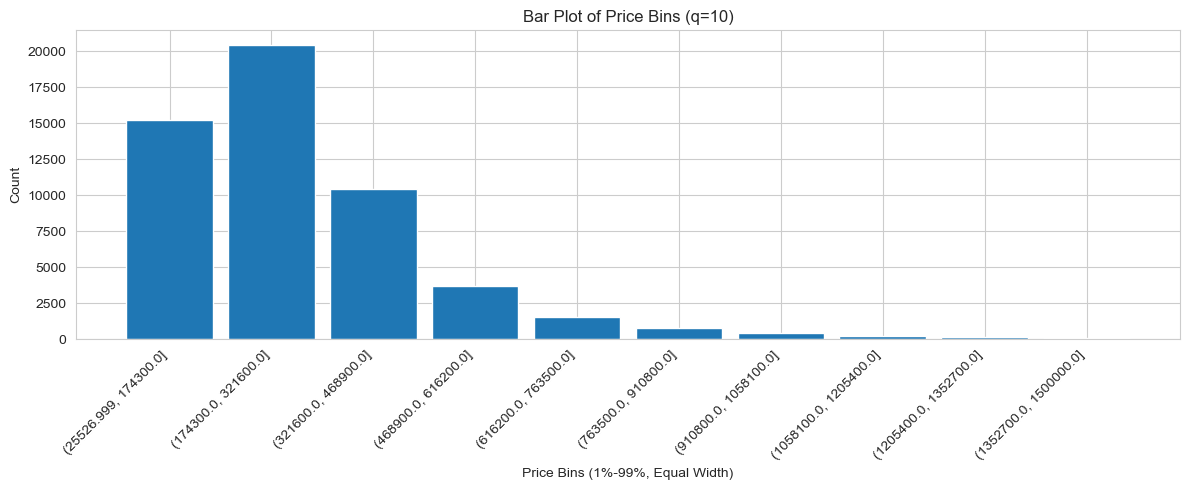

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 读取数据并转价格数值
df = pd.read_csv("ppr-group-25208508-train.csv")
price_num = pd.to_numeric(
    df["Price (€)"].astype(str).str.replace("€", "", regex=False).str.replace(",", "", regex=False).str.strip(),
    errors="coerce"
)

# 2) 取 2%-98% 区间
p2 = price_num.quantile(0.02)
p98 = price_num.quantile(0.98)
x = price_num[(price_num >= p1) & (price_num <= p99)].dropna()

# 3) 等频分箱（10 bins，数量均分）
# duplicates='drop' 防止重复边界导致报错
# bins = pd.qcut(x, q=10, duplicates="drop")
bins = pd.cut(x, bins=10, include_lowest=True, right=True)


# 4) 统计并画 bar plot
freq = bins.value_counts(sort=False)

plt.figure(figsize=(12, 5))
plt.bar(range(len(freq)), freq.values, width=0.85)
plt.xticks(range(len(freq)), [str(i) for i in freq.index], rotation=45, ha="right")
plt.xlabel("Price Bins (1%-99%, Equal Width)")
plt.ylabel("Count")
plt.title("Bar Plot of Price Bins (q=10)")
plt.tight_layout()
plt.show()


## 8) Quick Visual Checks on Price Distribution


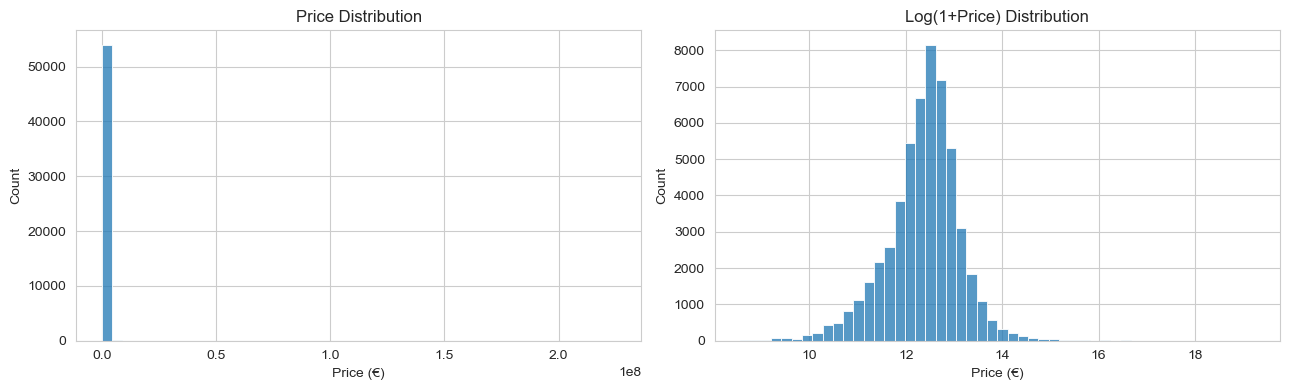

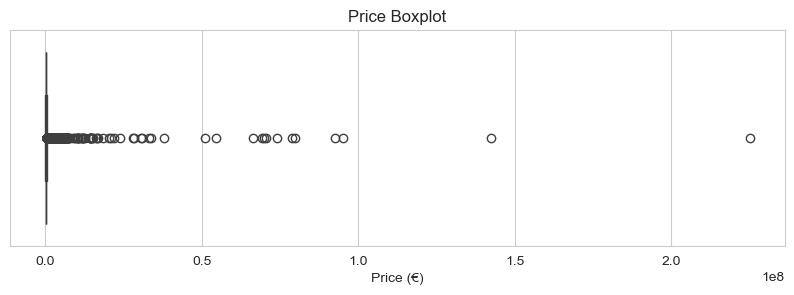

In [ ]:
# Price distribution (target)
price_col = 'Price (€)'
if price_col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(13, 4))

    sns.histplot(df[price_col].dropna(), bins=50, ax=axes[0])
    axes[0].set_title('Price Distribution')

    sns.histplot(np.log1p(df[price_col].dropna()), bins=50, ax=axes[1])
    axes[1].set_title('Log(1+Price) Distribution')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 2.8))
    sns.boxplot(x=df[price_col])
    plt.title('Price Boxplot')
    plt.show()


## 9) Save a Cleaned Preview CSV (Optional)


In [ ]:
# Keep this as a preview output for your own checks
out_file = 'ppr-group-25208508-train-lab3-preview.csv'
df.to_csv(out_file, index=False, encoding='utf-8')
print(f'Saved: {out_file}')


Saved: ppr-group-25208508-train-lab3-preview.csv


# 10) Make DQR Report (Optional)


## 10.1) Data Validation 数据验证
快速检查数据规模、空列、重复记录和关键字段有效性。

In [33]:
# Data validation checks
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")

all_null_cols = df.columns[df.isna().all()].tolist()
print(f"All-null columns: {all_null_cols if all_null_cols else 'None'}")

duplicate_count = int(df.duplicated().sum())
print(f"Duplicate rows: {duplicate_count}")

if 'Price (€)' in df.columns:
    invalid_price = int((df['Price (€)'] <= 0).sum(skipna=True))
    print(f"Invalid non-positive prices: {invalid_price}")

if 'Date of Sale (dd/mm/yyyy)' in df.columns:
    invalid_date = int(df['Date of Sale (dd/mm/yyyy)'].isna().sum())
    print(f"Missing/invalid dates (NaT): {invalid_date}")


Rows: 54000, Columns: 11
All-null columns: None
Duplicate rows: 9
Invalid non-positive prices: 0
Missing/invalid dates (NaT): 0


## 10.2) Standard DQR Tables 标准化报告表
输出与 Lab3 风格一致的数值和类别特征质量报告。

In [34]:
# Build standard DQR tables (Lab3-like format)
def build_numeric_dqr(df, columns):
    if not columns:
        return pd.DataFrame()
    stats = df[columns].describe().T
    miss_pct = 100 * (df[columns].isna().sum() / len(df))
    card = df[columns].nunique(dropna=True)
    dqr = pd.concat(
        [stats, miss_pct.rename('%missing'), card.rename('cardinality')],
        axis=1
    )
    return dqr.sort_values(['%missing', 'cardinality'], ascending=[False, False])


def build_categorical_dqr(df, columns):
    if not columns:
        return pd.DataFrame()
    desc = df[columns].describe(include='all').T
    miss_pct = 100 * (df[columns].isna().sum() / len(df))
    card = df[columns].nunique(dropna=True)
    dqr = pd.concat(
        [desc, miss_pct.rename('%missing'), card.rename('cardinality')],
        axis=1
    )
    return dqr.sort_values(['%missing', 'cardinality'], ascending=[False, False])

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_dqr = build_numeric_dqr(df, numeric_columns)
categorical_dqr = build_categorical_dqr(df, categorical_columns)

print('Numeric DQR table:')
display(numeric_dqr)
print('Categorical DQR table:')
display(categorical_dqr)


Numeric DQR table:


/var/folders/jw/0ttqd5gn6_zf0xv62ypjvn9r0000gn/T/ipykernel_34108/1848734813.py:28: Pandas4Warning:

For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.



,count,mean,std,min,25%,50%,75%,max,%missing,cardinality
Price (€),54000.0,340638.819917,1.662132e+06,5250.0,157000.0,250000.0,365000.0,225000000.0,0.0,6845


Categorical DQR table:


,count,unique,top,freq,%missing,cardinality
Property Size Description,2836,4,greater than or equal to 38 sq metres and less...,2105,94.748148,4
Eircode,16892,16823,D24W9NN,4,68.718519,16823
Address,54000,53261,"AUGHNASEDA, MONAGHAN",5,0.000000,53261
County,54000,26,Dublin,16592,0.000000,26
Sale Month,54000,12,12,6449,0.000000,12
Sale Year,54000,9,2016,6000,0.000000,9
Description of Property,54000,3,Second-Hand Dwelling house /Apartment,44332,0.000000,3
Not Full Market Price,54000,2,No,51150,0.000000,2
VAT Exclusive,54000,2,No,44486,0.000000,2


## 10.3) Missingness Visual 缺失值可视化

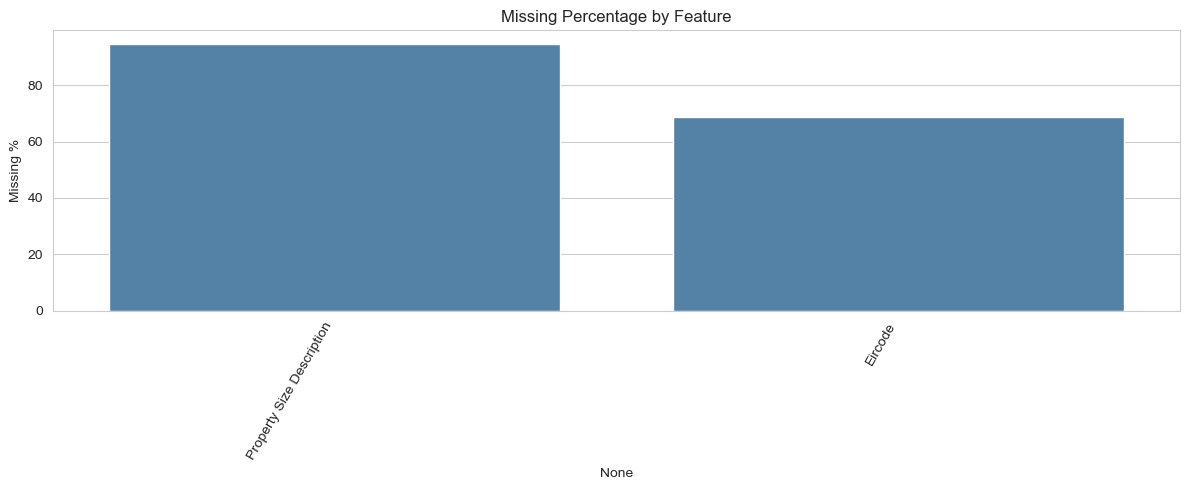

In [35]:
# Missing value percentage bar chart
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

plt.figure(figsize=(12, 5))
if len(missing_pct) > 0:
    sns.barplot(x=missing_pct.index, y=missing_pct.values, color='steelblue')
    plt.xticks(rotation=60, ha='right')
    plt.ylabel('Missing %')
    plt.title('Missing Percentage by Feature')
else:
    plt.text(0.5, 0.5, 'No missing values detected', ha='center', va='center')
    plt.title('Missing Percentage by Feature')
plt.tight_layout()
plt.show()


## 10.4) Visualizing Categorical Features 类别特征分布

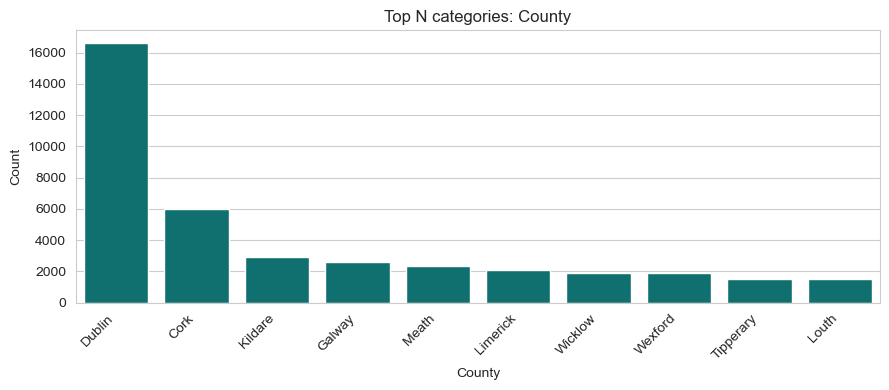

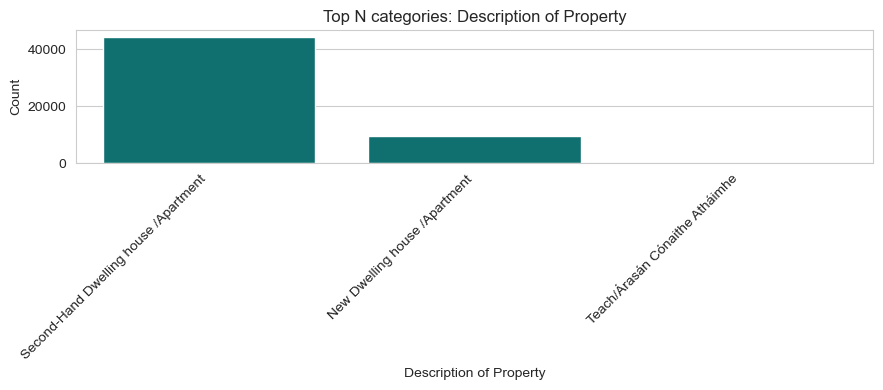

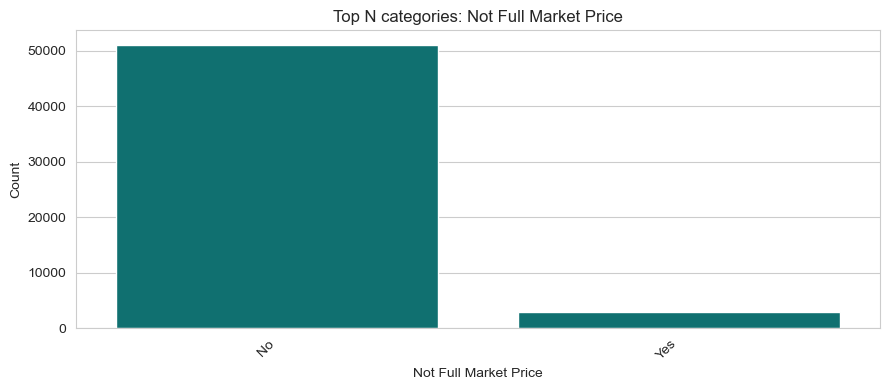

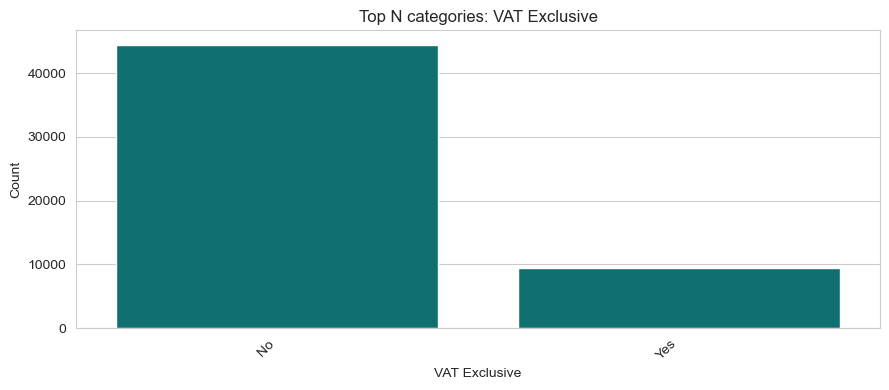

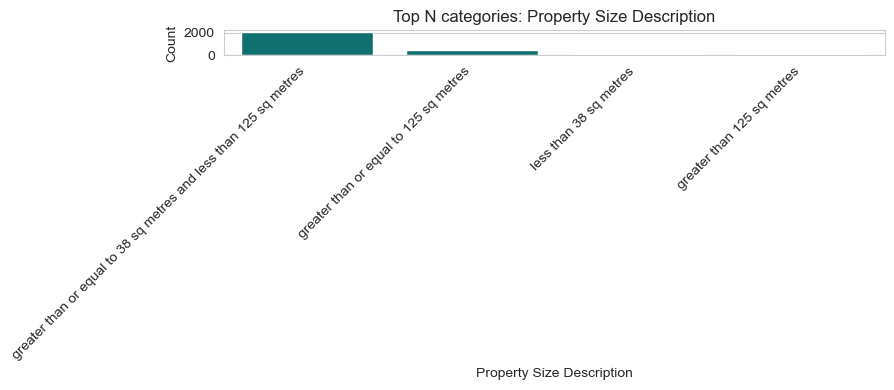

In [37]:
# Top-10 category bar plots for selected categorical columns
candidate_cats = [
    'County',
    'Description of Property',
    'Not Full Market Price',
    'VAT Exclusive',
    'Property Size Description'
]

plot_cols = [c for c in candidate_cats if c in df.columns]
for c in plot_cols:
    freq = df[c].value_counts(dropna=False).head(10)
    plt.figure(figsize=(9, 4))
    sns.barplot(x=freq.index.astype(str), y=freq.values, color='teal')
    plt.title(f'Top N categories: {c}')
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## 10.6) Price Trend by Time 价格时间趋势

2026-02-24 11:43:54,298 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-24 11:43:54,301 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


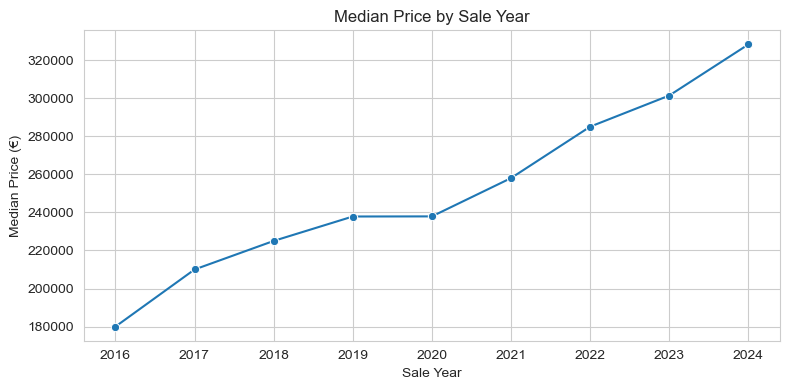

2026-02-24 11:43:54,398 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-24 11:43:54,401 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


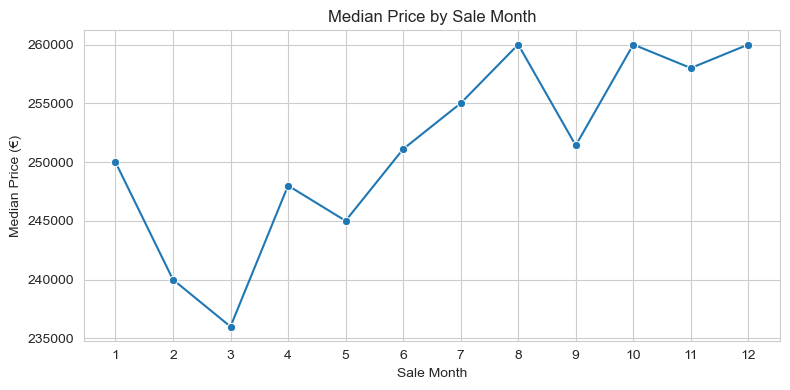

In [ ]:
# Median price trend by Sale Year and Sale Month
if {'Price (€)', 'Sale Year'}.issubset(df.columns):
    yr = (
        df.dropna(subset=['Price (€)', 'Sale Year'])
          .groupby('Sale Year', observed=False)['Price (€)']
          .median() # 每月价格中位数
          .sort_index()
    )
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=yr.index.astype(str), y=yr.values, marker='o')
    plt.title('Median Price by Sale Year')
    plt.xlabel('Sale Year')
    plt.ylabel('Median Price (€)')
    plt.tight_layout()
    plt.show()

if {'Price (€)', 'Sale Month'}.issubset(df.columns):
    mo = (
        df.dropna(subset=['Price (€)', 'Sale Month'])
          .groupby('Sale Month', observed=False)['Price (€)']
          .median()
          .sort_index()
    )
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=mo.index.astype(str), y=mo.values, marker='o')
    plt.title('Median Price by Sale Month')
    plt.xlabel('Sale Month')
    plt.ylabel('Median Price (€)')
    plt.tight_layout()
    plt.show()


## 10.7) Price by County Boxplot 按地区价格箱线图

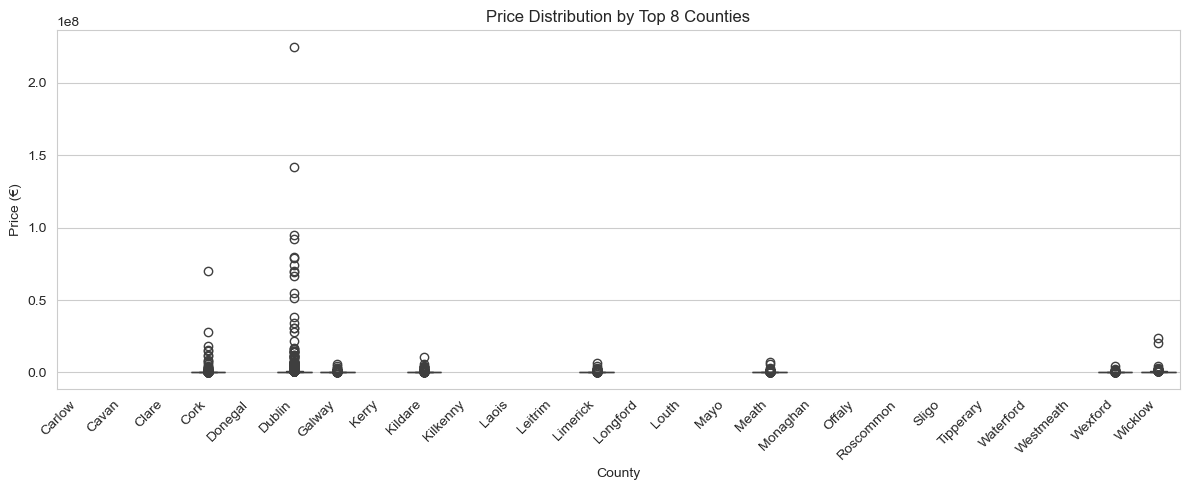

In [40]:
# Boxplot for top counties by count
if {'Price (€)', 'County'}.issubset(df.columns):
    top_n = 8
    top_counties = df['County'].value_counts(dropna=True).head(top_n).index
    tmp = df[df['County'].isin(top_counties)].copy()

    plt.figure(figsize=(12, 5))
    sns.boxplot(data=tmp, x='County', y='Price (€)')
    plt.title(f'Price Distribution by Top {top_n} Counties')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## 10.8) Comprehensive Summary and Export 综合汇总与导出

In [41]:
# Save DQR tables to CSV
numeric_out = 'PropertyPrice-DataQualityReport-NumericFeatures-Summary-Table.csv'
categorical_out = 'PropertyPrice-DataQualityReport-CategoricalFeatures-Summary-Table.csv'

if 'numeric_dqr' in globals() and not numeric_dqr.empty:
    numeric_dqr.to_csv(numeric_out, index_label='Feature')
    print(f"Saved: {numeric_out}")
else:
    print('Numeric DQR table is empty, not saved.')

if 'categorical_dqr' in globals() and not categorical_dqr.empty:
    categorical_dqr.to_csv(categorical_out, index_label='Feature')
    print(f"Saved: {categorical_out}")
else:
    print('Categorical DQR table is empty, not saved.')


Saved: PropertyPrice-DataQualityReport-NumericFeatures-Summary-Table.csv
Saved: PropertyPrice-DataQualityReport-CategoricalFeatures-Summary-Table.csv


## 10.9) Data Quality Plan 数据质量处理计划
按 Lab3 模板给出每个特征的问题与策略，后续可人工细化。

In [42]:
# Build a draft Data Quality Plan
feature_types = df.dtypes.astype(str)
missing_pct_map = (df.isna().mean() * 100)

rows = []
for col_name in df.columns:
    ftype = feature_types[col_name]
    miss = float(missing_pct_map[col_name])

    issues = []
    actions = []

    if miss > 30:
        issues.append(f'High missing values ({miss:.1f}%)')
        actions.append('Investigate source; consider drop or targeted imputation')
    elif miss > 0:
        issues.append(f'Missing values ({miss:.1f}%)')
        actions.append('Impute based on feature type (median/mode/domain rules)')

    if col_name == 'Price (€)':
        issues.append('Potential skewness and high-end outliers')
        actions.append('Use log transform and winsorize/cap for modeling if needed')

    if col_name in ['Eircode', 'Address']:
        issues.append('High-cardinality text/location feature')
        actions.append('Feature engineering or drop based on model objective')

    if not issues:
        issues = ['No major issue detected']
        actions = ['Keep as is']

    rows.append({
        'Feature': col_name,
        'Feature Type': ftype,
        'Data Quality Issue': '; '.join(issues),
        'Handling Strategy': '; '.join(actions)
    })

quality_plan_df = pd.DataFrame(rows)
display(quality_plan_df)

plan_out = 'PropertyPrice-DataQualityPlan-Draft.csv'
quality_plan_df.to_csv(plan_out, index=False)
print(f"Saved: {plan_out}")


,Feature,Feature Type,Data Quality Issue,Handling Strategy
0,Date of Sale (dd/mm/yyyy),datetime64[us],No major issue detected,Keep as is
1,Address,str,High-cardinality text/location feature,Feature engineering or drop based on model obj...
2,County,category,No major issue detected,Keep as is
3,Eircode,str,High missing values (68.7%); High-cardinality ...,Investigate source; consider drop or targeted ...
4,Price (€),float64,Potential skewness and high-end outliers,Use log transform and winsorize/cap for modeli...
5,Not Full Market Price,category,No major issue detected,Keep as is
6,VAT Exclusive,category,No major issue detected,Keep as is
7,Description of Property,category,No major issue detected,Keep as is
8,Property Size Description,category,High missing values (94.7%),Investigate source; consider drop or targeted ...
9,Sale Year,category,No major issue detected,Keep as is


Saved: PropertyPrice-DataQualityPlan-Draft.csv
